# Introduction

This notebook explores the fundamentals of the Machine Learning using KNearestNeigbours for regression analysis of the "Automobile Data Set" from https://archive.ics.uci.edu/ml/datasets/automobile

The aim is to predict a particular car's sale price given its features which includes information on many technical aspects of the car such as the weight of the car, mileage, acceleration, number of cylinders in the engine, horsepower, etc.



In [288]:
#import the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Draw plots inline
%matplotlib inline

pd.options.display.max_columns = 99 #number of columns to display inline for a dataframe

## Loading the Data

In [289]:
cars = pd.read_csv('imports-85.data') # Load the dataset into a Pandas Dataframe called 'cars'

In [290]:
cars.head() # Explore the first 5 rows

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [291]:
# The column names are not included. After reading about the data on https://archive.ics.uci.edu/ml/datasets/automobile
# we know that the column names should be as follows:

cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

In [292]:
# Reload the data with the column names
cars = pd.read_csv('imports-85.data', names = cols)

## Data Exploration and Cleaning

In [293]:
cars.info() #Summary of the dataframe. Seems like no missing values (205/205 non-null values)??

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-rate     205 non-null float64
horsepower           205 non-nul

In [294]:
cars.head(20) #Spot check of the first 20 rows

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


So even though "normalized-losses" column does not have null values, it does have missing values as indicated by the numerous "?"

In [295]:
# Replace the "?" with a null value so that python can treat it as such
cars.replace('?', np.nan, inplace = True)
cars.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,NaN


In [296]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    164 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         203 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 201 non-null object
stroke               201 non-null object
compression-rate     205 non-null float64
horsepower           203 non-nul

Now we can see that there were also other columns ('bore', 'stroke', 'horespower', etc.) that had "?" for missing values.

Also for the regression analysis we will only be focusing on numeric columns. 

In [297]:
#Identify the numeric columns and covert them to float for more accurate analysis
numeric_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars[numeric_cols] = cars[numeric_cols].astype(float)

In [298]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    164 non-null float64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         203 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null float64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression-rate     205 non-null float64
horsepower           203 no

In [299]:
cars_analysis = cars[numeric_cols]
cars_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
normalized-losses    164 non-null float64
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null float64
bore                 201 non-null float64
stroke               201 non-null float64
compression-rate     205 non-null float64
horsepower           203 non-null float64
peak-rpm             203 non-null float64
city-mpg             205 non-null float64
highway-mpg          205 non-null float64
price                201 non-null float64
dtypes: float64(14)
memory usage: 22.5 KB


In [300]:
cars_analysis.isnull().sum() #count the number of null values in the dataframe

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [301]:
cars_analysis.loc[cars_analysis['normalized-losses'].isnull() == True] # all the rows with null values in the "normalized-losses" columns

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,NaN,88.6,168.8,64.1,48.8,2548.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,NaN,94.5,171.2,65.5,52.4,2823.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
5,NaN,99.8,177.3,66.3,53.1,2507.0,3.19,3.40,8.5,110.0,5500.0,19.0,25.0,15250.0
7,NaN,105.8,192.7,71.4,55.7,2954.0,3.19,3.40,8.5,110.0,5500.0,19.0,25.0,18920.0
9,NaN,99.5,178.2,67.9,52.0,3053.0,3.13,3.40,7.0,160.0,5500.0,16.0,22.0,NaN
14,NaN,103.5,189.0,66.9,55.7,3055.0,3.31,3.19,9.0,121.0,4250.0,20.0,25.0,24565.0
15,NaN,103.5,189.0,66.9,55.7,3230.0,3.62,3.39,8.0,182.0,5400.0,16.0,22.0,30760.0
16,NaN,103.5,193.8,67.9,53.7,3380.0,3.62,3.39,8.0,182.0,5400.0,16.0,22.0,41315.0
17,NaN,110.0,197.0,70.9,56.3,3505.0,3.62,3.39,8.0,182.0,5400.0,15.0,20.0,36880.0


In [302]:
cars_analysis = cars_analysis.dropna(subset = ['price']) #drop the rows with null values in the target column - "price" since there are only four such rows
cars_analysis.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [303]:
cars_analysis.fillna(cars_analysis.mean(),inplace = True)

In [304]:
cars_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 14 columns):
normalized-losses    201 non-null float64
wheel-base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb-weight          201 non-null float64
bore                 201 non-null float64
stroke               201 non-null float64
compression-rate     201 non-null float64
horsepower           201 non-null float64
peak-rpm             201 non-null float64
city-mpg             201 non-null float64
highway-mpg          201 non-null float64
price                201 non-null float64
dtypes: float64(14)
memory usage: 23.6 KB


In [305]:
#Normalize the features because KNearestNeigbours uses the L2 Norm (Euclidean Distance) which will be skewed to larger scaled features
output_col = cars_analysis['price'] # the target column should not be normalized, so create a copy of it
cars_analysis = (cars_analysis - cars_analysis.min())/(cars_analysis.max() - cars_analysis.min()) #Min-Max Normalization (0 to 1 value range)
cars_analysis['price'] = output_col # set the target column to it unnormalized copy

In [306]:
cars_analysis.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


## Univariate Model Selection

In this section we will evaluate how well we can predict the sale price using only a single attribute

In [307]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

#Create a function that trains and evaluates a KNearestNeighbours model with default parameters (5 nearest neighbours)
def knn_train_test(train_col,output,df):
    
    np.random.seed(1) # set random seed for reproducibility of results
    
    #shuffle the rows of the dataframe for better analysis
    shuffled_index = np.random.permutation(df.index) 
    random_df = df.reindex(shuffled_index)
    
    #Split the data into training and test sets (70/30 split)
    length = len(random_df)
    training_set = random_df[:int(0.7*length)]
    test_set = random_df[int(0.7*length):]
    
    #Train the model
    knn = KNeighborsRegressor() #instantiate the model using default parameters (5 nearest neighbours)
    knn.fit(training_set[[train_col]], training_set[output])#fit the model
    
    #Make Predictions
    predictions = knn.predict(test_set[[train_col]])
    
    #Evaluate the performance using the Root Mean Squared Metric
    mse = mean_squared_error(test_set[output], predictions)
    rmse = mse ** 0.5
    return rmse


#Evaluate how well each numerical feature helps predict the sale price of a car
rmses = {}
feature_cols = cars_analysis.columns.tolist()
feature_cols.remove('price')
for col in feature_cols:
    rmse = knn_train_test(col,'price', cars_analysis)
    rmses[col] = rmse

rmse_results = pd.Series(rmses) #Create a series object from the dictionary for better viewing
print(rmse_results)

normalized-losses    7043.386224
wheel-base           4911.734241
length               5152.139338
width                4713.578445
height               7537.246118
curb-weight          4533.329569
bore                 7626.834927
stroke               6813.540394
compression-rate     6285.447643
horsepower           4465.724474
peak-rpm             7284.608939
city-mpg             3773.323474
highway-mpg          5138.833519
dtype: float64


In [308]:
#Create a function that trains and evaluates a model for a given # of nearest neighbours

def knn_train_test(train_col,output,df, kvals):
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    random_df = df.reindex(shuffled_index)
    length = len(random_df)
    training_set = random_df[:int(0.7*length)]
    test_set = random_df[int(0.7*length):]
    rmses = {}
    for k in kvals:
        knn = KNeighborsRegressor(n_neighbors = k)
        knn.fit(training_set[[train_col]], training_set[output])
        predictions = knn.predict(test_set[[train_col]])
        mse = mean_squared_error(test_set[output], predictions)
        rmse = mse ** 0.5
        rmses[k] = rmse
    return pd.Series(rmses)

In [309]:
#Evaluate how well each numerical feature helps predict the sale price of a car for # of nearest neigbours = 1,3,5,7,9

rmses = {}
feature_cols = cars_analysis.columns.tolist()
feature_cols.remove('price')

k_values = [1,3,5,7,10]
for col in feature_cols:
    rmse = knn_train_test(col,'price', cars_analysis, k_values)
    rmses[col] = rmse


rmse_results = pd.DataFrame(rmses)
rmse_results


,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg
1,7128.502473,4188.654602,5595.553063,4397.173979,8115.177734,5531.952107,11954.262611,6950.226253,9765.654928,3465.985676,7831.708278,6074.837216,7760.656756
3,6949.512432,4258.962280,5248.560171,4658.165469,7656.919663,5309.186273,8256.090410,7169.321130,6808.244932,4249.534162,7907.850957,4228.473402,5259.283072
5,7043.386224,4911.734241,5152.139338,4713.578445,7537.246118,4533.329569,7626.834927,6813.540394,6285.447643,4465.724474,7284.608939,3773.323474,5138.833519
7,6934.898615,5303.202645,5052.245749,4747.906765,7843.065563,4564.820154,7824.552118,7230.757631,5825.993395,4511.688530,7023.553789,3938.194347,5006.529961
10,7379.585615,5177.167459,5035.803182,4659.468696,7502.110588,4677.816476,7500.930548,7697.632383,6497.157816,4881.548343,6967.099513,4680.657867,5244.863211


Text(0, 0.5, 'RMSE')

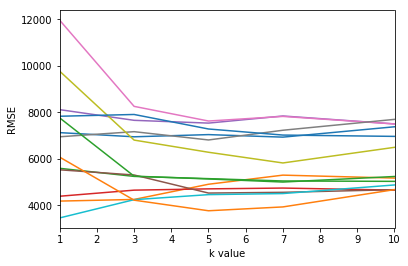

In [310]:
#For each attribute, plot the RMSE for # of nearest neigbours = 1,3,5,7,9

rmse_results.plot.line(legend = False)
plt.xlabel('k value')
plt.ylabel('RMSE')

In [311]:
rmse_results.mean().sort_values() #calculate the aerage RMSE for all the k vales for a particular attribute

horsepower           4314.896237
city-mpg             4539.097261
width                4635.258671
wheel-base           4767.944246
curb-weight          4923.420916
length               5216.860300
highway-mpg          5682.033304
compression-rate     7036.499743
normalized-losses    7087.177072
stroke               7172.295558
peak-rpm             7402.964295
height               7730.903933
bore                 8632.534123
dtype: float64

## Multivariate Model Selection

In this section we will evaluate how well we can predict the sale price using multiple attributes that performed the best in the univariate models

In [312]:
# Select the features that performed the best (lowest average RMSE across multiple values of nearest neighbours) in the Univariate Model

two_best_features = ['horsepower', 'city-mpg']
three_best_features = ['horsepower','city-mpg','width']
four_best_features = ['horsepower','city-mpg','width','wheel-base']
five_best_features = ['horsepower','city-mpg','width','wheel-base', 'curb-weight']
six_best_features = ['horsepower','city-mpg','width','wheel-base', 'curb-weight', 'length']

In [313]:
#Create a function that trains and evaluates a multivariate model for a given # of nearest neighbours

multi_col_rmse_results = {}

def knn_train_test(train_col,output,df, kvals):
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    random_df = df.reindex(shuffled_index)
    length = len(random_df)
    training_set = random_df[:int(length*0.7)]
    test_set = random_df[int(length*0.7):]
    rmses = {}
    for k in kvals:
        knn = KNeighborsRegressor(n_neighbors = k)
        knn.fit(training_set[train_col], training_set[output])
        predictions = knn.predict(test_set[train_col])
        mse = mean_squared_error(test_set[output], predictions)
        rmse = mse ** 0.5
        rmses[k] = rmse
    return pd.Series(rmses)

k_values = [1,3,5,7,10]

# Compute RMSE for the various multivariate models 
rmse = knn_train_test(two_best_features,'price', cars_analysis, k_values)
multi_col_rmse_results['two_best_features'] = rmse

rmse = knn_train_test(three_best_features,'price', cars_analysis, k_values)
multi_col_rmse_results['three_best_features'] = rmse

rmse = knn_train_test(four_best_features,'price', cars_analysis, k_values)
multi_col_rmse_results['four_best_features'] = rmse

rmse = knn_train_test(five_best_features,'price', cars_analysis, k_values)
multi_col_rmse_results['five_best_features'] = rmse

rmse = knn_train_test(six_best_features,'price', cars_analysis, k_values)
multi_col_rmse_results['six_best_features'] = rmse

multi_col_rmse_results = pd.DataFrame(multi_col_rmse_results)
multi_col_rmse_results

,two_best_features,three_best_features,four_best_features,five_best_features,six_best_features
1,3018.949524,2664.145679,2983.345839,2765.130080,2625.240663
3,3639.154919,3348.757918,3628.939140,3507.442913,3485.998855
5,3823.822382,3646.884331,3786.510699,3646.678929,3674.811828
7,4246.362631,3996.850560,3916.532085,3841.104566,3862.885887
10,4416.711544,3988.243405,4293.365203,4186.375525,4175.453551


In [314]:
#Sort the multivariate models based on the lowest average RMSE across 1,3,5,7,9 nearest neighbours 
multi_col_rmse_results.mean().sort_values()

three_best_features    3528.976379
six_best_features      3564.878157
five_best_features     3589.346403
four_best_features     3721.738593
two_best_features      3829.000200
dtype: float64

##### We can see that the multivariate KNearestNeighbours regression models perform much better than the univariate models

## Comparison with Linear Regression

For curiosity lets compare the performance of the KNN models with Linear Regression models

In [315]:
#Train and evaluate a linear regression model that uses all the numerical features

from sklearn.linear_model import LinearRegression

length = len(cars_analysis)
feature_cols = cars_analysis.columns.tolist()
feature_cols.remove('price')
training_set = cars_analysis.loc[:int(0.7*length),feature_cols]
training_labels = cars_analysis.loc[:int(0.7*length),'price']
test_set = cars_analysis.loc[int(0.7*length):,feature_cols]
test_labels = cars_analysis.loc[int(0.7*length):,'price']
lr = LinearRegression()
lr.fit(training_set,training_labels)
predictions = lr.predict(test_set)
rmse = mean_squared_error(test_labels, predictions)**0.5
print(rmse)

3653.1800805599482


This RMSE is not as good as the best RMSE of the KNN models

In [316]:
#Train and evaluate a linear regression model with the best three features that were identified during the KNN model analysis
from sklearn.linear_model import LinearRegression

length = len(cars_analysis)
feature_cols = ['horsepower','city-mpg','width']
training_set = cars_analysis.loc[:int(0.7*length),feature_cols]
training_labels = cars_analysis.loc[:int(0.7*length),'price']
test_set = cars_analysis.loc[int(0.7*length):,feature_cols]
test_labels = cars_analysis.loc[int(0.7*length):,'price']
lr = LinearRegression()
lr.fit(training_set,training_labels)
predictions = lr.predict(test_set)
rmse = mean_squared_error(test_labels, predictions)**0.5
print(rmse)

3315.2765278123093


This Linear Regression RMSE is now better than even the best KNN RMSE!!